## Load libraries

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

## Load dataset

In [376]:
data = pd.read_csv('train.csv')
# original_data.set_index('PassengerId', inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [377]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [378]:
data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

## Visualize Data

In [379]:
def visualize_missing_data(data):
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    print("Records with NaN values:")
    plt.show()

Records with NaN values:


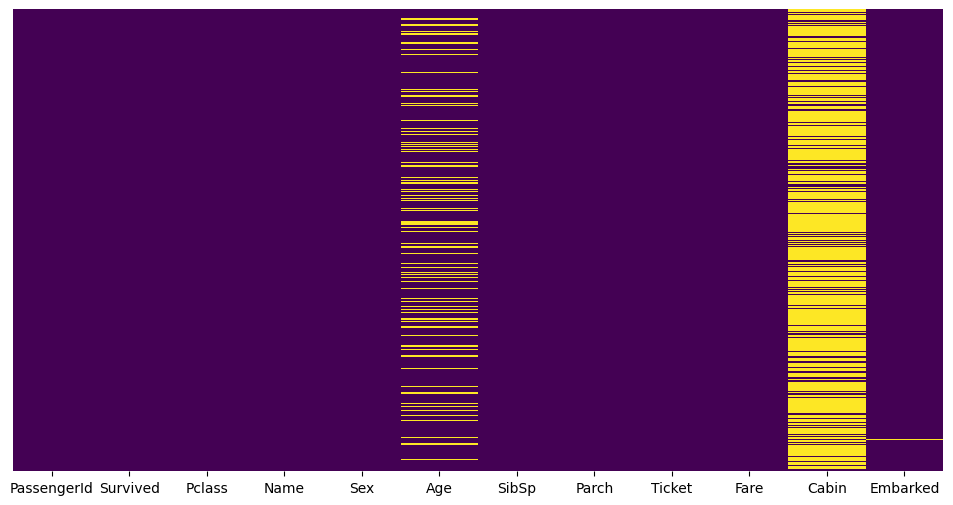

In [380]:
visualize_missing_data(data)

## Prepare Data

### Honorifics Extraction

In [381]:
def extract_honorifics(data):
    honorifics = data['Name']
    pattern = r"([A-Z][a-z]+)\."
    honorifics = honorifics.str.extract(pattern, expand=False)
    data['Honorific'] = honorifics
    return data

### Family Size Extraction

$FamilySize = ParentsChildren + SiblingsSpouses + 1$

In [345]:
def extract_family_size(data):
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

### Deck Extraction

In [359]:
def extract_deck(data):
    data['Cabin'] = data['Cabin'].fillna('U')
    data['Deck'] = data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    return data

### Extract data

In [401]:
honorifics_top = None

def extract_data(data):
    global honorifics_top
    extract_honorifics(data)
    display(data["Honorific"].describe())
    honorifics_top = data["Honorific"].value_counts().index[0]
    print("Most common honorific:", honorifics_top)

    extract_family_size(data)
    display(data["FamilySize"].describe())

    extract_deck(data)
    display(data["Deck"].describe())

In [422]:
extract_data(data)

count     891
unique     17
top        Mr
freq      517
Name: Honorific, dtype: object

Most common honorific: Mr


count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

count     891
unique      9
top         U
freq      687
Name: Deck, dtype: object

Encoding nominal attributes

In [404]:
columns_to_encode = ["Sex", "Ticket", "Cabin", "Embarked", "Honorific", "Deck"]
encoder = LabelEncoder()
encoding_maps = {}

encoded_data = data.copy()

for column in columns_to_encode:
    encoded_column = encoder.fit_transform(encoded_data[column])
    encoded_map = pd.concat([encoded_data[column], pd.Series(encoded_column)], axis=1, keys=[column, "Encoded Value"]).drop_duplicates().sort_values(column).reset_index(drop=True).transpose()
    display(encoded_map)
    encoded_data[column] = encoded_column
    
    encoding_maps[column] = dict(zip(encoded_map.loc[column], encoded_map.loc["Encoded Value"]))

,0,1
Sex,female,male
Encoded Value,0,1


,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680
Ticket,110152,110413,110465,110564,110813,111240,111320,111361,111369,111426,...,STON/O2. 3101290,SW/PP 751,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735
Encoded Value,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680


,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,F E69,F G63,F G73,F2,F33,F38,F4,G6,T,U
Encoded Value,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147


,0,1,2,3
Embarked,C,Q,S,NaN
Encoded Value,0,1,2,3


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Honorific,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Encoded Value,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16


,0,1,2,3,4,5,6,7,8
Deck,A,B,C,D,E,F,G,T,U
Encoded Value,0,1,2,3,4,5,6,7,8


Records with NaN values:


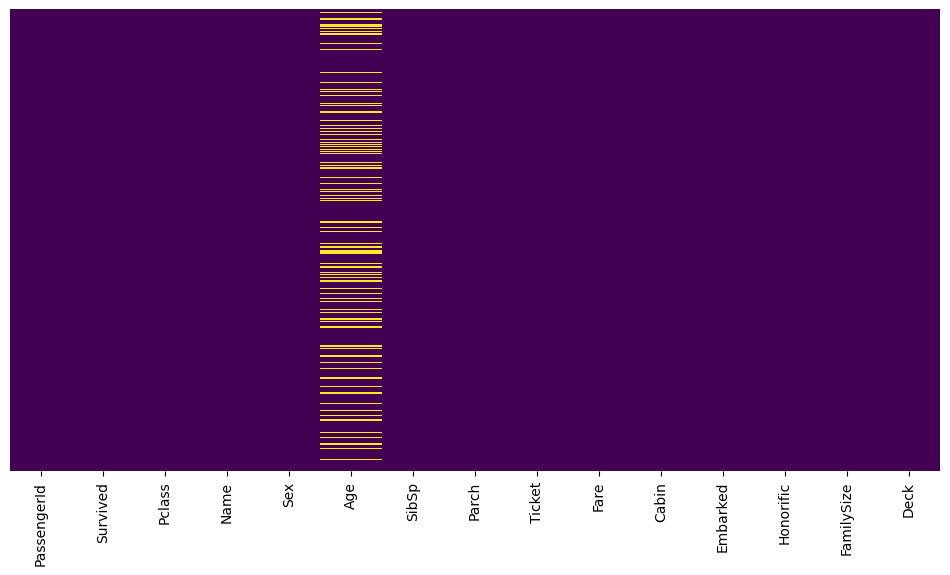

In [405]:
visualize_missing_data(encoded_data)

### Fix missing data

#### Predict missing ages using linear regression

In [406]:
# age_avg = encoded_data["Age"].mean()
# encoded_data["Age"].fillna(age_avg, inplace=True)
age_not_null = encoded_data[encoded_data["Age"].notnull()]

# create a linear regression to predict the age
from sklearn.linear_model import LinearRegression

features = ["Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked", "Cabin", "Honorific", "Deck", "FamilySize"]

age_model = LinearRegression()
age_model.fit(age_not_null[features], age_not_null["Age"])

age_null = encoded_data[encoded_data["Age"].isnull()]
age_predicted = age_model.predict(age_null[features])
encoded_data.loc[age_null.index, "Age"] = age_predicted

Records with NaN values:


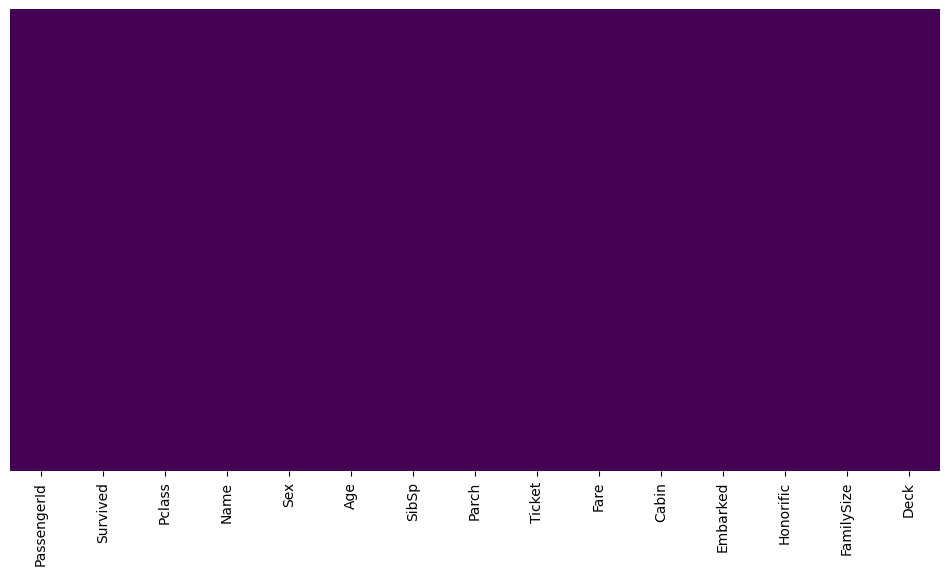

In [407]:
visualize_missing_data(encoded_data)

## Declare Training and Test Sets

### Declaring Training and Test Sets from the training dataset

In [408]:
y_data = encoded_data["Survived"]
X_data = encoded_data.drop(["Survived", "Name"], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 712 samples.
Testing set has 179 samples.


### The Actual Test Set for submission

In [409]:
test_data = pd.read_csv('test.csv')
extract_data(test_data)

for column in columns_to_encode:
    encoded_column = test_data[column]
    encoded_values = [encoding_maps[column][value] if value in encoding_maps[column] else np.nan for value in encoded_column]
    test_data[column] = encoded_values

test = test_data.drop(["Name"], axis=1)

display(test)

count     418
unique      9
top        Mr
freq      240
Name: Honorific, dtype: object

Most common honorific: Mr


count    418.000000
mean       1.839713
std        1.519072
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

count     418
unique      8
top         U
freq      327
Name: Deck, dtype: object

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific,FamilySize,Deck
0,892,3,1,34.5,0,0,NaN,7.8292,147.0,1,12.0,1,8
1,893,3,0,47.0,1,0,NaN,7.0000,147.0,2,13.0,2,8
2,894,2,1,62.0,0,0,NaN,9.6875,147.0,1,12.0,1,8
3,895,3,1,27.0,0,0,NaN,8.6625,147.0,2,12.0,1,8
4,896,3,0,22.0,1,1,251.0,12.2875,147.0,2,13.0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,NaN,8.0500,147.0,2,12.0,1,8
414,1306,1,0,39.0,0,0,611.0,108.9000,NaN,0,NaN,1,2
415,1307,3,1,38.5,0,0,NaN,7.2500,147.0,2,12.0,1,8
416,1308,3,1,NaN,0,0,NaN,8.0500,147.0,2,12.0,1,8


Records with NaN values:


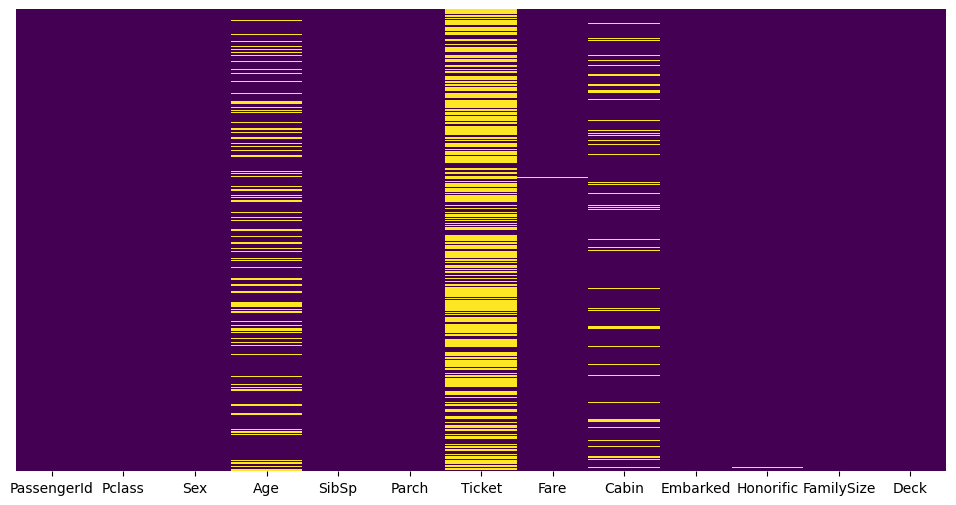

In [410]:
visualize_missing_data(test)

### Prepare test set for model input

In [411]:
age_avg = test["Fare"].mean()
test["Fare"].fillna(age_avg, inplace=True)

test["Cabin"].fillna(encoding_maps["Cabin"]['U'], inplace=True) # fill nan with 'U'

# replace nan with the honorifics_top value
test["Honorific"].fillna(encoding_maps["Honorific"][honorifics_top], inplace=True)

# predict the missing age values
age_null = test[test["Age"].isnull()]
age_predicted = age_model.predict(age_null[features])
test.loc[age_null.index, "Age"] = age_predicted

Records with NaN values:


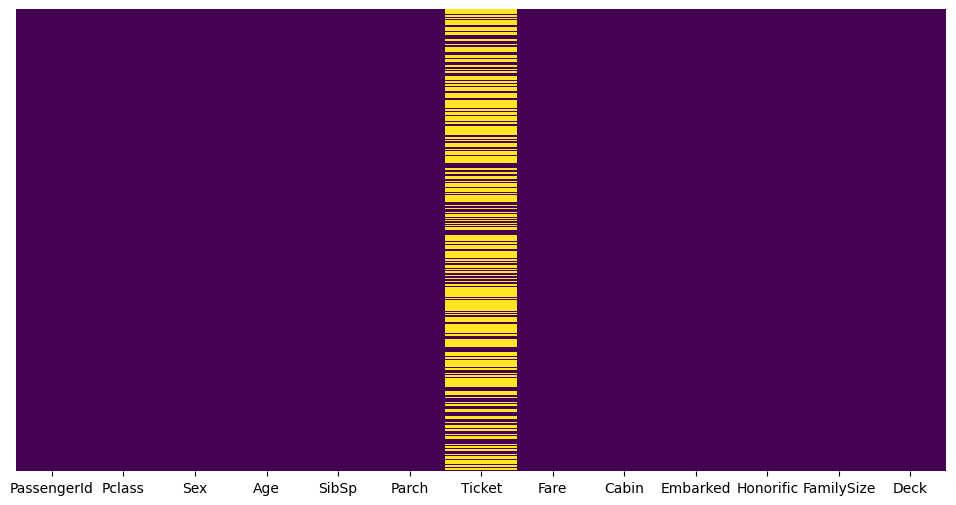

In [412]:
visualize_missing_data(test)

## Random Forest

In [415]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Cabin", "Honorific", "Deck", "FamilySize"]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train[features], y_train)
predictions = model.predict(X_test[features])

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, predictions)
print("F1 score:", f1)

precision = precision_score(y_test, predictions)
print("Precision:", precision)

recall = recall_score(y_test, predictions)
print("Recall:", recall)


Accuracy: 0.8491620111731844
F1 score: 0.8137931034482759
Precision: 0.8309859154929577
Recall: 0.7972972972972973


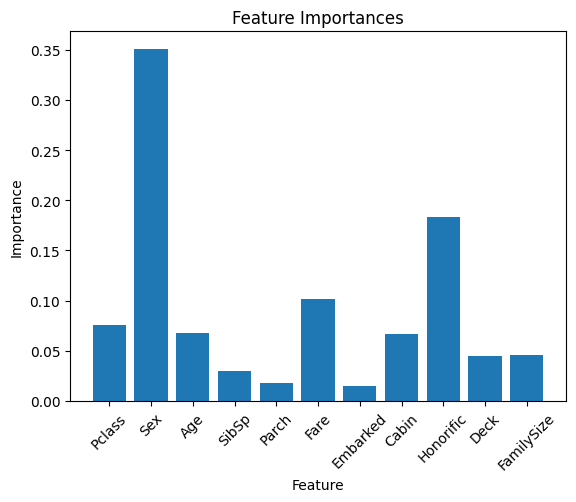

In [416]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(ticks=np.arange(len(features)), labels=features, rotation=45)
plt.show()

### Train with the whole data for submission

In [424]:
model.fit(X_data[features], y_data)
predictions = model.predict(test[features])

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Submission is successfully saved!")

Submission is successfully saved!
